# Cat and Dog Image Classifier

You will be working on this project with Google Colaboratory.

After going to that link, create a copy of the notebook either in your own account or locally. Once you complete the project and it passes the test (included at that link), submit your project link below. If you are submitting a Google Colaboratory link, make sure to turn on link sharing for "anyone with the link."

We are still developing the interactive instructional content for the machine learning curriculum. For now, you can go through the video challenges in this certification. You may also have to seek out additional learning resources, similar to what you would do when working on a real-world project.

For this challenge, you will complete the code to classify images of dogs and cats. You will use TensorFlow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):

```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```

You can tweak epochs and batch size if you like, but it is not required.

The following instructions correspond to specific cell numbers, indicated with a comment at the top of the cell (such as # 3).

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

## Cell 3

Now it is your turn! Set each of the variables in this cell correctly. (They should no longer equal None.)

Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one. For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay in the order that our test expects. For test_data_gen it will also be helpful to observe the directory structure.

After you run the code, the output should look like this:
```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 class.
```

In [6]:
# tree

# DeepAI

# Function to print the directory structure
def print_dir_structure(path, level=0):
    # List all the files and directories in the given path
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        print(' ' * level + '|-- ' + item)
        if os.path.isdir(item_path):  # If the item is a directory, recurse
            print_dir_structure(item_path, level + 4)

# Print the structure starting from the main directory
print_dir_structure(PATH)

|-- .DS_Store
|-- validation
    |-- .DS_Store
    |-- dogs
        |-- dog.2240.jpg
        |-- dog.2409.jpg
        |-- dog.2292.jpg
        |-- dog.2124.jpg
        |-- dog.2378.jpg
        |-- dog.2080.jpg
        |-- dog.2456.jpg
        |-- dog.2392.jpg
        |-- dog.2061.jpg
        |-- dog.2268.jpg
        |-- dog.2092.jpg
        |-- dog.2399.jpg
        |-- dog.2176.jpg
        |-- dog.2078.jpg
        |-- dog.2254.jpg
        |-- dog.2477.jpg
        |-- dog.2015.jpg
        |-- dog.2014.jpg
        |-- dog.2297.jpg
        |-- dog.2027.jpg
        |-- dog.2272.jpg
        |-- dog.2182.jpg
        |-- dog.2353.jpg
        |-- dog.2274.jpg
        |-- dog.2464.jpg
        |-- dog.2136.jpg
        |-- dog.2065.jpg
        |-- dog.2319.jpg
        |-- dog.2365.jpg
        |-- dog.2481.jpg
        |-- dog.2484.jpg
        |-- dog.2151.jpg
        |-- dog.2095.jpg
        |-- dog.2366.jpg
        |-- dog.2253.jpg
        |-- dog.2237.jpg
        |-- dog.2158.jpg
        |-- dog

In [30]:
# 3
# train_image_generator = None
# validation_image_generator = None
# test_image_generator = None

# train_data_gen = None
# val_data_gen = None
# test_data_gen = None

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# https://stackoverflow.com/questions/70080062/how-to-correctly-use-imagedatagenerator-in-keras

# train_image_generator = ImageDataGenerator(rescale=1./255)
# validation_image_generator = ImageDataGenerator(rescale=1./255)
# test_image_generator = ImageDataGenerator(rescale=1./255)

# train_data_gen = flow_from_directory(
#     directory=train_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',
#     batch_size=32
# )

# val_data_gen = flow_from_directory(
#     directory=validation_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',
#     batch_size=32
# )

# test_data_gen = flow_from_directory(
#     directory=test_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=False
# )

# DeepAI

# # Create ImageDataGenerator instances for training, validation, and testing
# train_image_generator = ImageDataGenerator(rescale=1./255)
# validation_image_generator = ImageDataGenerator(rescale=1./255)
# test_image_generator = ImageDataGenerator(rescale=1./255)

# # Create generator for training data
# train_data_gen = train_image_generator.flow_from_directory(
#     directory=train_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',
#     batch_size=32
# )

# # Create generator for validation data
# val_data_gen = validation_image_generator.flow_from_directory(
#     directory=validation_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',
#     batch_size=32
# )

# # Create generator for testing data
# test_data_gen = test_image_generator.flow_from_directory(
#     directory=test_dir,
#     target_size=(IMG_HEIGHT, IMG_WIDTH),
#     class_mode='categorical',
#     batch_size=32,
#     shuffle=False
# )

# https://forum.freecodecamp.org/t/machine-learning-cat-and-dog-image-classifier-completion/473523
# https://colab.research.google.com/drive/1ti3J0dPuhxAoTaWmdMGvAqqK8VJwoSvR?usp=sharing

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           batch_size=batch_size,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              batch_size=batch_size,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(directory=PATH,
                                                         classes=['test'],
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size=batch_size,
                                                         shuffle=False,)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


## Cell 4

The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot five random training images.

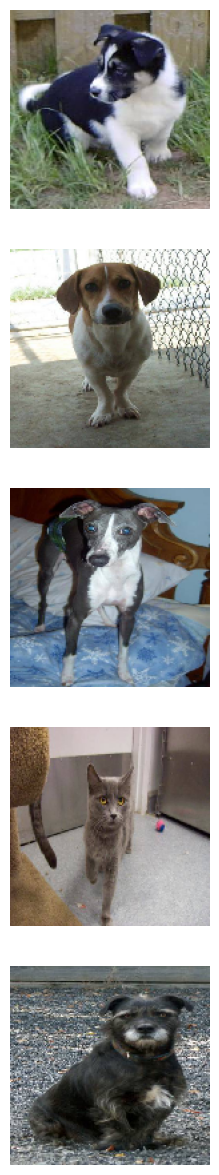

In [32]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


## Cell 5

Recreate the train_image_generator using ImageDataGenerator.

Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [9]:
# 5
# train_image_generator = None

# DeepAI

# Create an ImageDataGenerator with various augmentations
train_image_generator = ImageDataGenerator(
    rescale=1./255,                    # Rescale pixel values to [0, 1]
    rotation_range=40,                 # Rotate images by up to 40 degrees
    width_shift_range=0.2,             # Randomly shift images horizontally by 20%
    height_shift_range=0.2,            # Randomly shift images vertically by 20%
    shear_range=0.2,                   # Shear transformations
    zoom_range=0.2,                    # Randomly zoom in/out up to 20%
    horizontal_flip=True,              # Randomly flip images horizontally
    fill_mode='nearest'                # Fill missing pixels after transformations
)


# Cell 6

You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


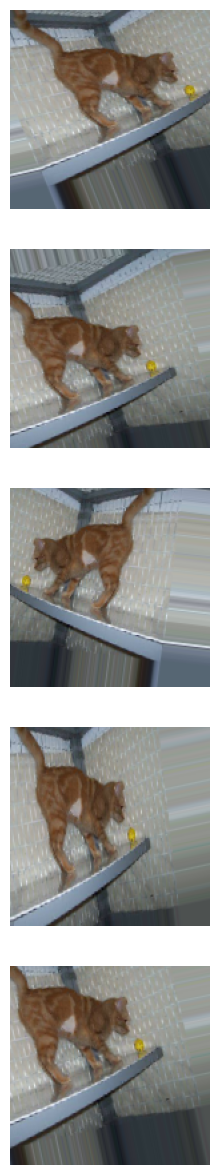

In [10]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

## Cell 7

In this cell, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [24]:
# 7
# model = Sequential()
# model.summary()

# https://keras.io/guides/sequential_model/
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

# import keras
# from keras import layers
# from keras import ops

# model = keras.Sequential()
# model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
# model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
# model.add(layers.Conv2D(32, 3, activation="relu"))
# model.add(layers.MaxPooling2D(3))

# model.summary()

# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss=keras.losses.BinaryCrossentropy(),
#     metrics=['accuracy']
# )

# DeepAI

# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define number of classes based on your dataset
# num_classes = 2  # Change to your actual number of classes

# # Define the model
# model = models.Sequential()

# # Add the convolutional and max pooling layers
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# # Flatten the pooled feature maps
# model.add(layers.Flatten())

# # Add a fully connected layer
# model.add(layers.Dense(128, activation='relu'))

# # Output layer with num_classes for class probability distribution
# model.add(layers.Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if your classes are integers
#               metrics=['accuracy'])

# # Summarize the model
# model.summary()


# https://colab.research.google.com/drive/1ti3J0dPuhxAoTaWmdMGvAqqK8VJwoSvR?usp=sharing#scrollTo=1niQDz5x6K7y

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(2))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,930 (9.39 MB)

 Trainable params: 2,460,930 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

## Cell 8

Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

In [26]:
# 8
# history = None

# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

# model.fit(
#     x=train_data_gen,
#     epochs=2,
#     validation_data=val_data_gen,
#     steps_per_epoch=10,
#     validation_steps=10
# )

# DeepAI

# model.fit(
#     train_data_gen,
#     steps_per_epoch=train_data_gen.samples // train_data_gen.batch_size,  # Total number of samples / batch size
#     epochs=10,  # Adjust the number of epochs as necessary
#     validation_data=val_data_gen,
#     validation_steps=val_data_gen.samples // val_data_gen.batch_size  # Total number of samples / batch size
# )


# https://colab.research.google.com/drive/1ti3J0dPuhxAoTaWmdMGvAqqK8VJwoSvR?usp=sharing#scrollTo=1niQDz5x6K7y

history = model.fit(x=train_data_gen,
                    steps_per_epoch=total_train // batch_size,
                    epochs=epochs,
                    validation_data=val_data_gen,
                    validation_steps=total_val // batch_size)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.4886 - loss: 1.6178 - val_accuracy: 0.5301 - val_loss: 0.6922
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:17 6s/step - accuracy: 0.6484 - loss: 0.6913

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.6484 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 124s 8s/step - accuracy: 0.4735 - loss: 0.6940 - val_accuracy: 0.4944 - val_loss: 0.6872
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 0.5469 - loss: 0.6868 - val_accuracy: 0.5865 - val_loss: 0.6719
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 123s 8s/step - accuracy: 0.5192 - loss: 0.6921 - val_accuracy: 0.5011 - val_loss: 0.6773
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5234 - loss: 0.6837 - val_accuracy: 0.5385 - val_loss: 0.6613
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.5047 - loss: 0.6849 - val_accuracy: 0.5904 - val_loss: 0.6525
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.5312 - loss: 0.6669 - val_accuracy: 0.6154 - val_loss: 0.6561
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 132s 8s/step - accuracy: 0.5769 - loss: 0.6680 - val_accuracy: 0.6060 - val_loss:

## Cell 9

Run this cell to visualize the accuracy and loss of the model.

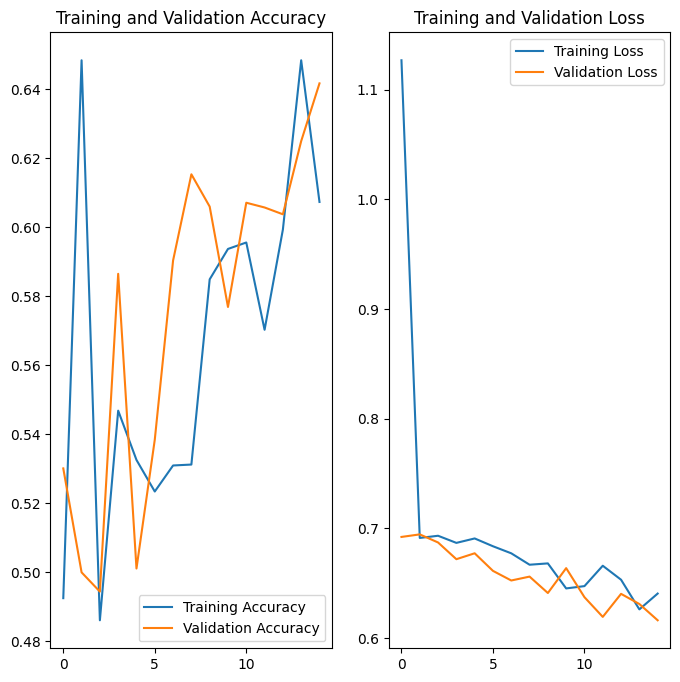

In [27]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Cell 10

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


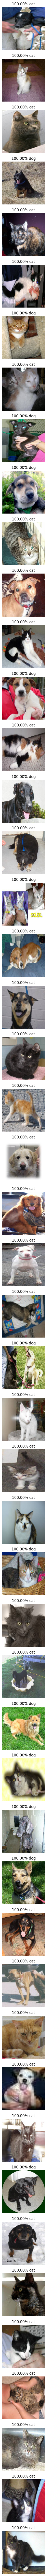

In [34]:
# 10

# DeepAI

# # Get a batch of test images and their labels (labels can be ignored here)
# test_images, _ = next(test_data_gen)

# # Make predictions for the test images
# predictions = model.predict(test_images)

# # Get probabilities of being a dog (usually class '1')
# dog_probabilities = predictions[:, 1]  # Get the probabilities for dogs

# # Convert probabilities to a list of integers for labeling
# # Scale to percentage and convert to integer (0-100)
# probabilities = (dog_probabilities * 100).astype(int)

# # Show probabilities and corresponding images
# plotImages(test_images[:50], probabilities[:50])  # Display the first 50 test images and their probabilities



# See Cell 4 for plotImages() Function
# https://colab.research.google.com/drive/1ti3J0dPuhxAoTaWmdMGvAqqK8VJwoSvR?usp=sharing#scrollTo=vYrSifOit2aK

test_images, _ = next(test_data_gen)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
plotImages(test_images, probabilities=probabilities)

## Cell 11

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [35]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
